## Preprocessing

In [218]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [219]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


<b>Target variable</b> = IS_SUCCESSFUL -- 1 is considered yes (successful) and 0 is considered no (not successful)

<b>Features</b> = there are 9 features - all the other columns

In [220]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [221]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [222]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [223]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [224]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [225]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [226]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [227]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

## Attempt #1<br>
APPLICATION_TYPE cutoff = 600<br>
CLASSIFICATION cutoff = 300<br>
layer1 = 9 : activation function = relu<br>
layer2 = 18 : activation function = relu<br>

In [228]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 9)                 396       
_________________________________________________________________
dense_29 (Dense)             (None, 18)                180       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 19        
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [229]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [230]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [231]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.6058 - accuracy: 0.6917
Epoch 2/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5604 - accuracy: 0.7283
Epoch 3/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5551 - accuracy: 0.7285
Epoch 4/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5529 - accuracy: 0.7295
Epoch 5/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5514 - accuracy: 0.7306
Epoch 6/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5505 - accuracy: 0.7306
Epoch 7/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5496 - accuracy: 0.7304
Epoch 8/100
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5494 - accuracy: 0.7313
Epoch 9/100
25724/25724 [==============================] - 3s 134us/sample - loss: 0.5486 - accuracy: 0.7320
Epoc

In [232]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5714 - accuracy: 0.7250
Loss: 0.5520526611353148, Accuracy: 0.7250145673751831


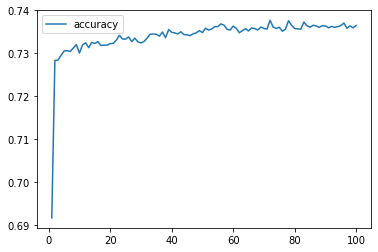

In [233]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [234]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity1.h5')

RESULTS:

<b>This is Attempt #1</b>
<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 9 : activation function = relu
<br>layer2 = 18 : activation function = relu

Loss: 0.5536191259042167, Accuracy: 0.727580189704895

A loss value of 55 indicates that the model can be further optimized.<br>
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

I need to make some changes in order to get to 75% accuracy.

---

I also ran the following variables through this model:

<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 12
<br>layer2 = 24

Loss: 0.5522796763553564, Accuracy: 0.7250145673751831


<br>APPLICATION_TYPE cutoff = 800
<br>CLASSIFICATION cutoff = 1000
<br>layer1 = 12
<br>layer2 = 24

Loss: 0.5575985619278065, Accuracy: 0.7231487035751343

---
---

## Attempt #2 -- adding a hidden layer
APPLICATION_TYPE cutoff = 600<br>
CLASSIFICATION cutoff = 300<br>
layer1 = 9 : activation function = relu<br>
layer2 = 18 : activation function = relu<br>
layer3 = 27 : activation function = relu

In [235]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 = 9
# hidden_nodes_layer2 = 18
# hidden_nodes_layer3 = 27

# nn = tf.keras.models.Sequential()

# First hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
# nn.summary()

In [236]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [237]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
# y_test = np.array(y_test)
# y_train = np.array(y_train)

In [238]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

In [239]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [240]:
# plotting the accuracy
# history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
# history_df.plot(y = 'accuracy')

In [241]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity2.h5')

RESULTS:

<b>This is Attempt #2</b>
<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 9 : activation function = relu
<br>layer2 = 18 : activation function = relu
<br>layer3 = 27 : activation function = relu

Loss: 0.5541777287836325, Accuracy: 0.7258309125900269

A loss value of 55 indicates that the model can be further optimized.<br>
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

Still not at 75% accuracy. Will try something drastic next.

-----

I also ran the following variables through this model:

<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 12
<br>layer2 = 24
<br>layer3 = 36

Loss: 0.5545361445735565, Accuracy: 0.7241982221603394


<br>APPLICATION_TYPE cutoff = 800
<br>CLASSIFICATION cutoff = 1000
<br>layer1 = 12
<br>layer2 = 24
<br>layer3 = 36

Loss: 0.5560268456039207, Accuracy: 0.7268804907798767

---
---

## Attempt #3 -- changing the activation functions
APPLICATION_TYPE cutoff = 600<br>
CLASSIFICATION cutoff = 300<br>
layer1 = 9 : activation function = relu<br>
layer2 = 18 : activation function = tanh<br>
layer3 = 27 : activation function = tanh

In [242]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = len(X_train_scaled[0])
# hidden_nodes_layer1 = 9
# hidden_nodes_layer2 = 18
# hidden_nodes_layer3 = 27

# nn = tf.keras.models.Sequential()

# First hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
# nn.summary()

In [243]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [244]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
# y_test = np.array(y_test)
# y_train = np.array(y_train)

In [245]:
# THIS TAKES AT LEAST THREE AND A HALF MINUTES
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

In [246]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [247]:
# plotting the accuracy
# history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
# history_df.plot(y = 'accuracy')

In [248]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity3.h5')

RESULTS:

<b>This is Attempt #3</b>
<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 9 : activation function = relu
<br>layer2 = 18 : activation function = tanh
<br>layer3 = 27 : activation function = tanh

Loss: 0.5513413424950647, Accuracy: 0.7266472578048706

A loss value of 55 indicates that the model can be further optimized.<br>
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

Still not at 75% accuracy. I give up.

-----

I also ran the following variables through this model:

<br>APPLICATION_TYPE cutoff = 600
<br>CLASSIFICATION cutoff = 300
<br>layer1 = 12
<br>layer2 = 24
<br>layer3 = 36

Loss: 0.5520951250065173, Accuracy: 0.7255976796150208


<br>APPLICATION_TYPE cutoff = 800
<br>CLASSIFICATION cutoff = 1000
<br>layer1 = 12
<br>layer2 = 24
<br>layer3 = 36

Loss: 0.555375917367963, Accuracy: 0.7251312136650085

---
---